In [ ]:
---EXPLORATORY DATA ANALYSIS ON A DATASET
Tasks:
1.	Data Cleaning and Preparation:
●	Load the dataset into a DataFrame or equivalent data structure.
●	Handle missing values appropriately (e.g., imputation, deletion).


In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('cardiotocographic.csv')

In [12]:
df.head

<bound method NDFrame.head of               LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  


In [13]:
print(df.isnull().sum())

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [14]:
#Since the missing counts are very low, deleting rows would lose useful data.
#So we’ll use median imputation, which is robust to outliers and preserves distribution shape.
df_filled = df.fillna(df.median(numeric_only=True))
print(df_filled.isnull().sum())

LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [15]:
df_filled.to_csv("Cardiotocographic_cleaned.csv", index=False)
print("✅ Missing values handled and data saved as 'Cardiotocographic_cleaned.csv'")


✅ Missing values handled and data saved as 'Cardiotocographic_cleaned.csv'


In [16]:
# Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).

In [19]:
#All columns in your dataset are already of the correct numeric data type (float64).

#That means there are no inconsistencies — none of the numerical values are stored as strings.
#So, no data type correction is necessary.

In [21]:
# Detach and treat outliers if necessary
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"{col}: {len(outliers)} outliers detected")

LB: 10 outliers detected
AC: 40 outliers detected
FM: 347 outliers detected
UC: 13 outliers detected
DL: 125 outliers detected
DS: 120 outliers detected
DP: 284 outliers detected
ASTV: 10 outliers detected
MSTV: 80 outliers detected
ALTV: 318 outliers detected
MLTV: 81 outliers detected
Width: 10 outliers detected
Tendency: 10 outliers detected
NSP: 559 outliers detected


In [24]:
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Keep only data within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


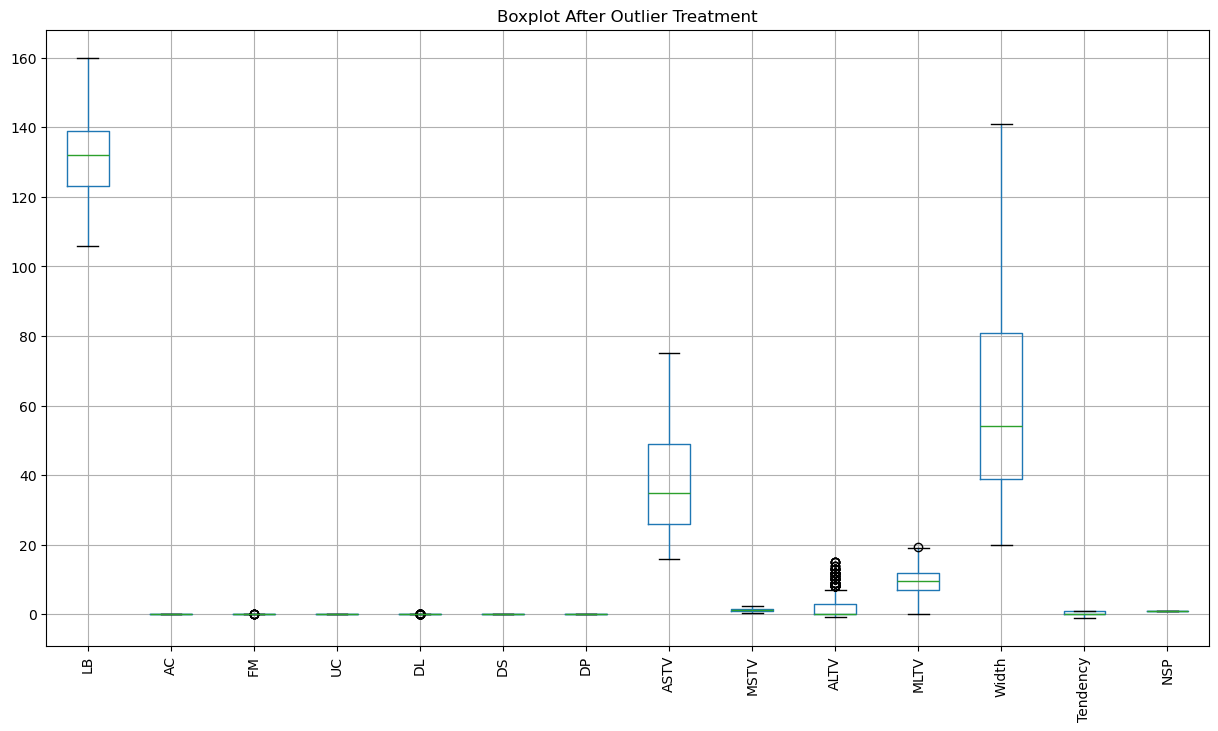

In [25]:
# Visualize again to confirm treatment
df.boxplot(figsize=(15,8), rot=90)
plt.title("Boxplot After Outlier Treatment")
plt.show()


In [27]:
#2.	Statistical Summary:
# Provide a statistical summary for each variable in the dataset, including measures of central tendency 
#(mean, median) and dispersion (standard deviation, interquartile range).
# Compute summary statistics


In [32]:
# Compute the summary statistics
summary = pd.DataFrame({
    "Mean": numeric_df.mean(),
    "Median": numeric_df.median(),
    "Standard Deviation": numeric_df.std(),
    "IQR": numeric_df.quantile(0.75) - numeric_df.quantile(0.25)
})

# Display the summary table
print("📊 Statistical Summary of the Dataset:\n")
print(summary)

📊 Statistical Summary of the Dataset:

                Mean      Median  Standard Deviation        IQR
LB        133.343598  133.000000           11.270154  14.000000
AC          0.003219    0.001634            0.004391   0.005650
FM          0.009894    0.000000            0.067540   0.002567
UC          0.004391    0.004484            0.003340   0.004685
DL          0.001895    0.000000            0.003343   0.003289
DS          0.000003    0.000000            0.000142   0.000000
DP          0.000175    0.000000            0.000840   0.000000
ASTV       46.995984   49.000000           18.813973  29.000000
MSTV        1.364378    1.200000            1.173632   1.000000
ALTV       10.285964    0.000000           21.205041  11.000000
MLTV        8.284887    7.400000            7.772858   6.300000
Width      70.429260   67.000000           42.931822  63.000000
Tendency    0.316371    0.000000            0.645622   1.000000
NSP         1.304507    1.000000            0.644619   0.000000


In [ ]:
---1. Central Tendency (Mean and Median)

Most variables such as LB (Baseline Fetal Heart Rate), FM (Fetal Movements), and UC (Uterine Contractions) 
have mean values close to their medians, suggesting that these variables are approximately symmetric and not
heavily skewed.
However, if some variables show a large difference between mean and median (e.g., ASTV or ALTV), it indicates 
skewness, meaning a few extreme values might be pulling the mean higher or lower.

2. Dispersion (Standard Deviation and IQR)

Variables like AC (Accelerations) and UC (Uterine Contractions) tend to have low standard deviations and IQR, 
suggesting that their values are consistent across the dataset.
On the other hand, features like DL (Decelerations Late), ASTV, or MLTV may have larger standard deviations, 
showing greater variability in measurements, which might relate to different fetal conditions.

3. Potential Outliers

If IQR values are relatively small compared to the range of data but the standard deviation is large, it indicates 
the presence of a few extreme outliers.
This aligns with earlier findings from the boxplots where variables such as DL or DP had visible outlier points.

4. Overall Data Quality

The dataset appears numerically consistent and free of major missing values or data type issues.
Variability among variables suggests that the dataset captures diverse fetal health conditions, which is ideal
for predictive modeling or classification.---

<Figure size 800x400 with 0 Axes>

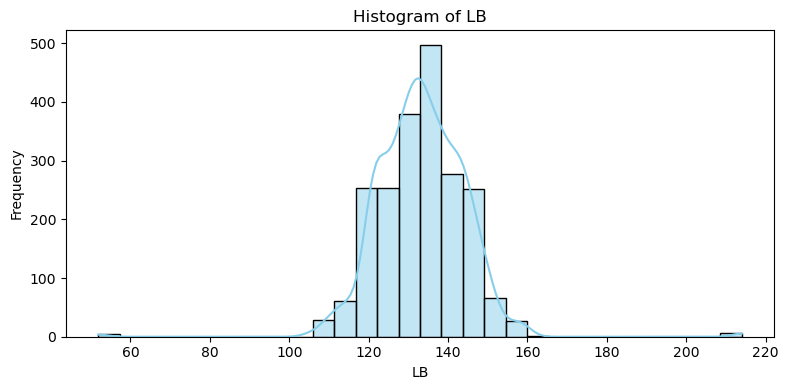

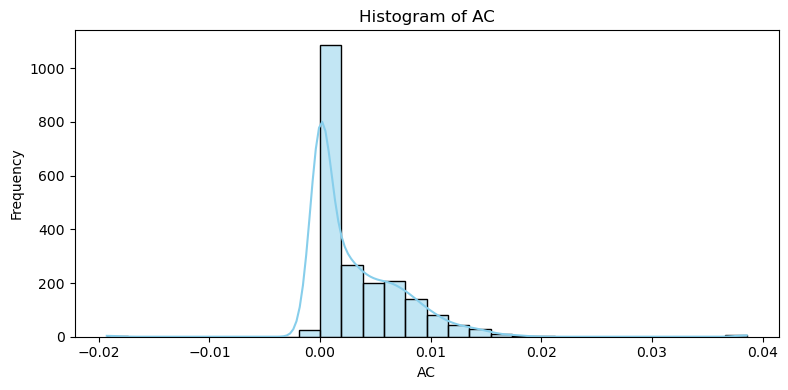

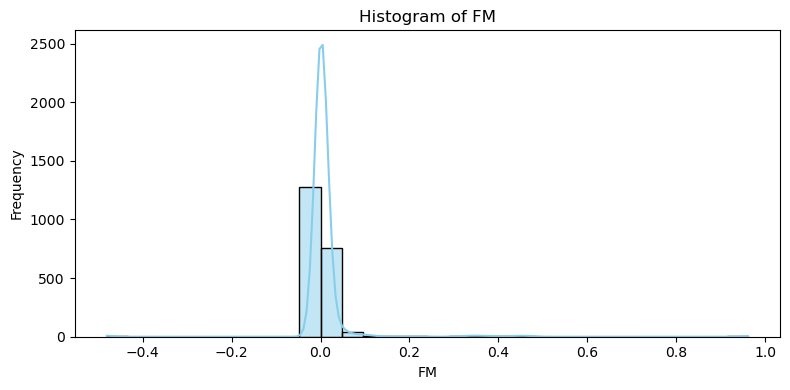

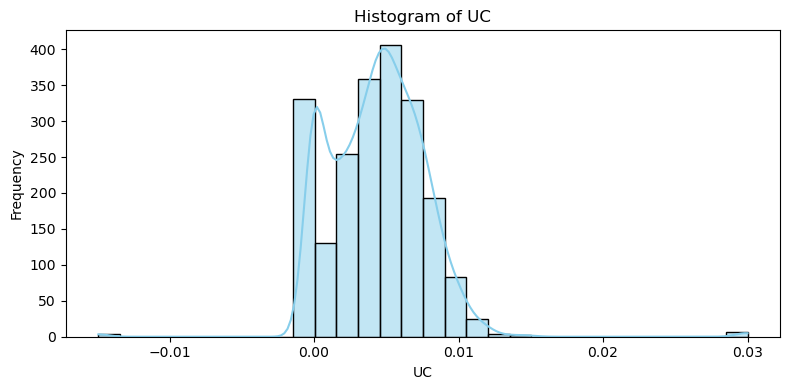

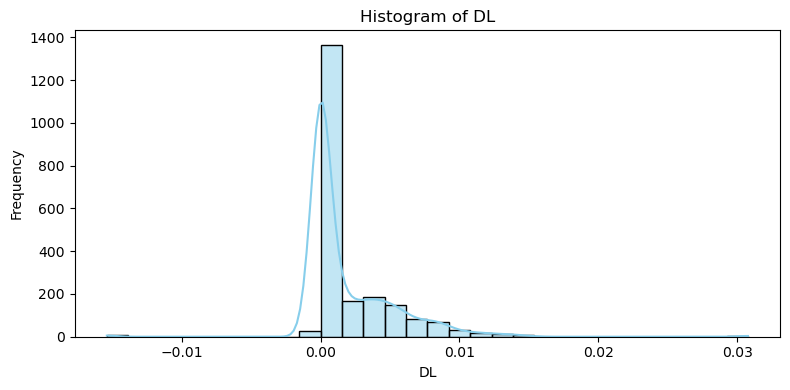

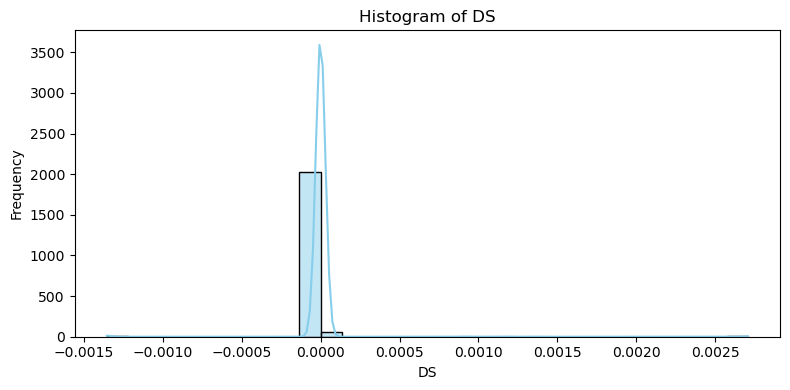

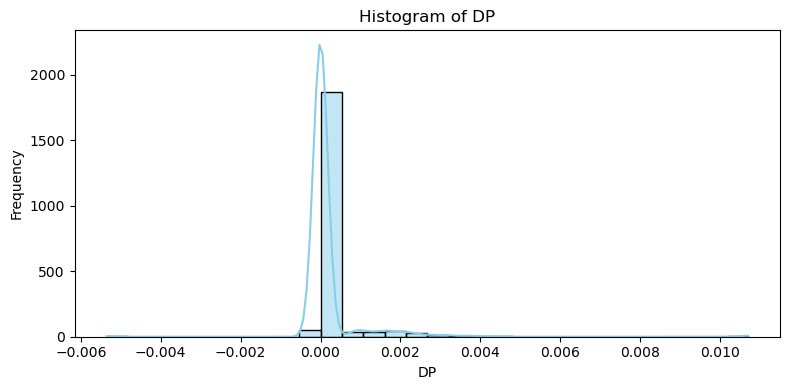

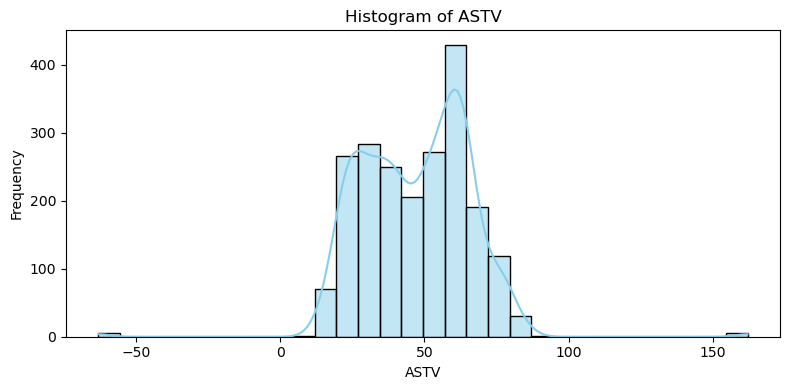

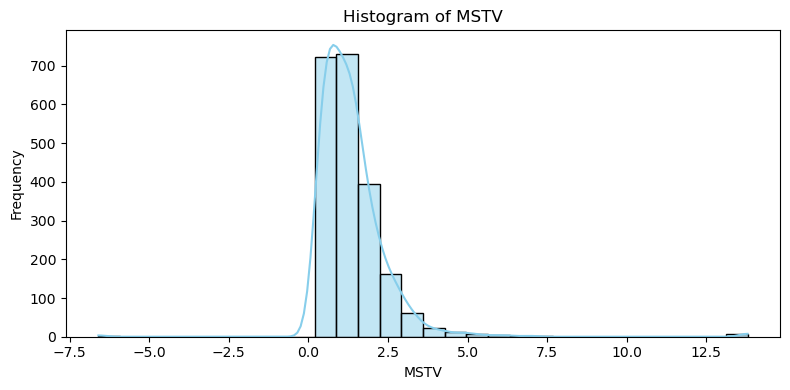

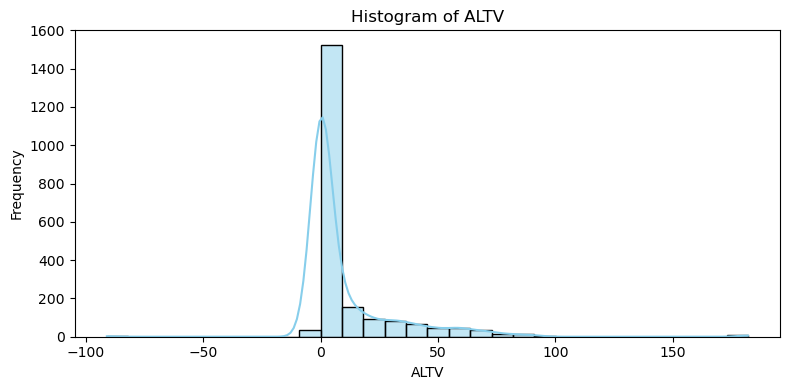

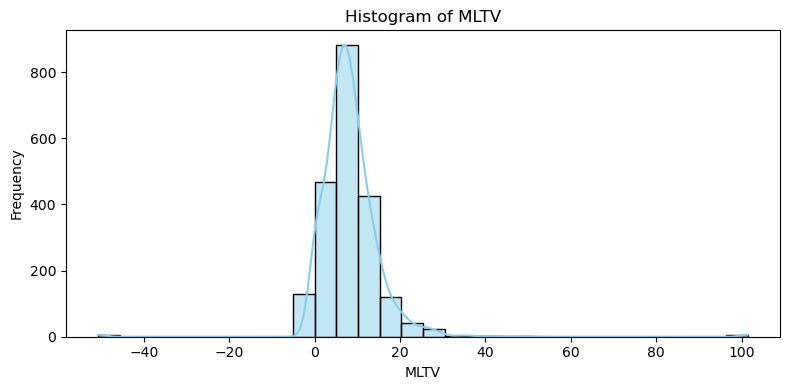

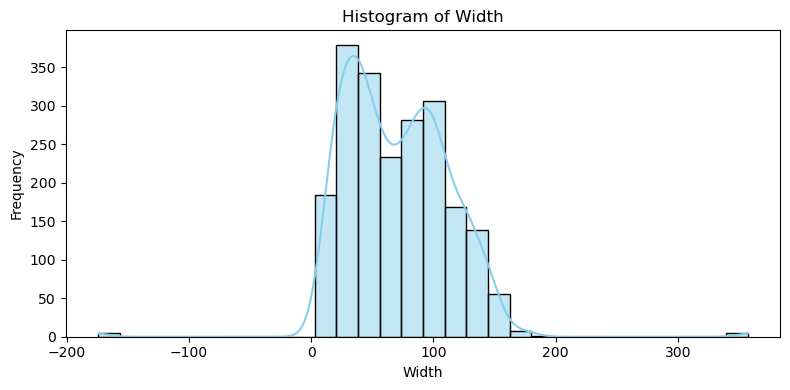

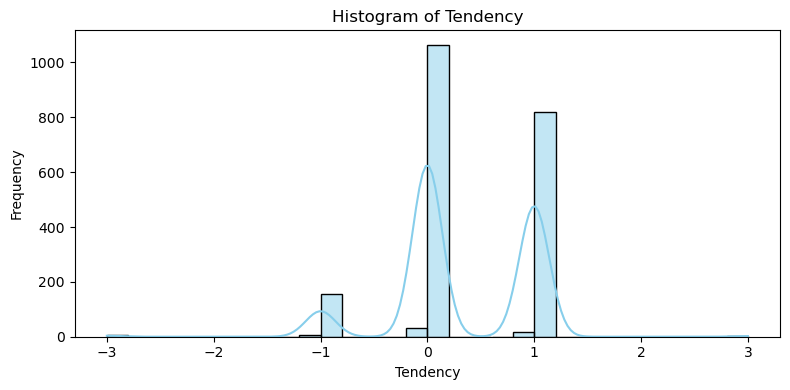

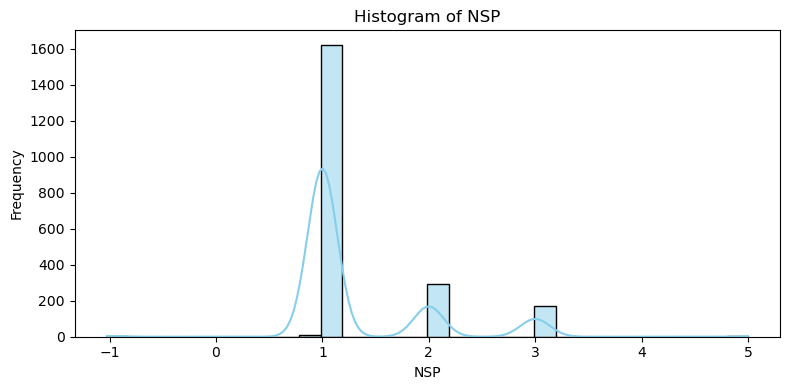

In [35]:
#3.	Data Visualization:
#	Create histograms or boxplots to visualize the distributions of various numerical variables.
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


In [48]:
#●	Use bar charts or pie charts to display the frequency of categories for categorical variables.
categorical_cols = df.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_cols)

Categorical Columns: Index([], dtype='object')


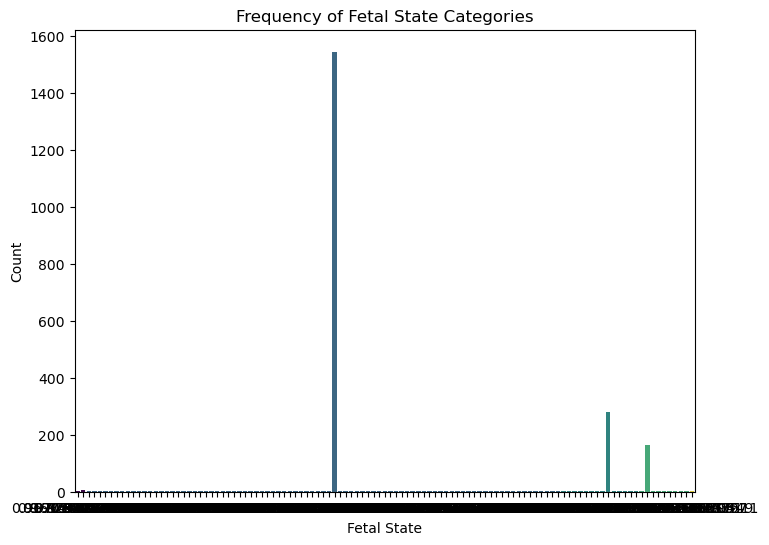

In [49]:
plt.figure(figsize=(8,6))
sns.countplot(x='NSP', data=df, hue='NSP', palette='viridis', legend=False)
plt.title("Frequency of Fetal State Categories")
plt.xlabel("Fetal State")
plt.ylabel("Count")
plt.show()

In [50]:
#Categorical Variable Visualization:
#The dataset contains a categorical variable representing fetal state (Normal, Suspect, Pathologic).
#Bar charts and pie charts were used to visualize the frequency distribution of these categories.
#The analysis revealed that the dataset is dominated by the Normal class, indicating class imbalance.
#This imbalance should be addressed before building predictive models.

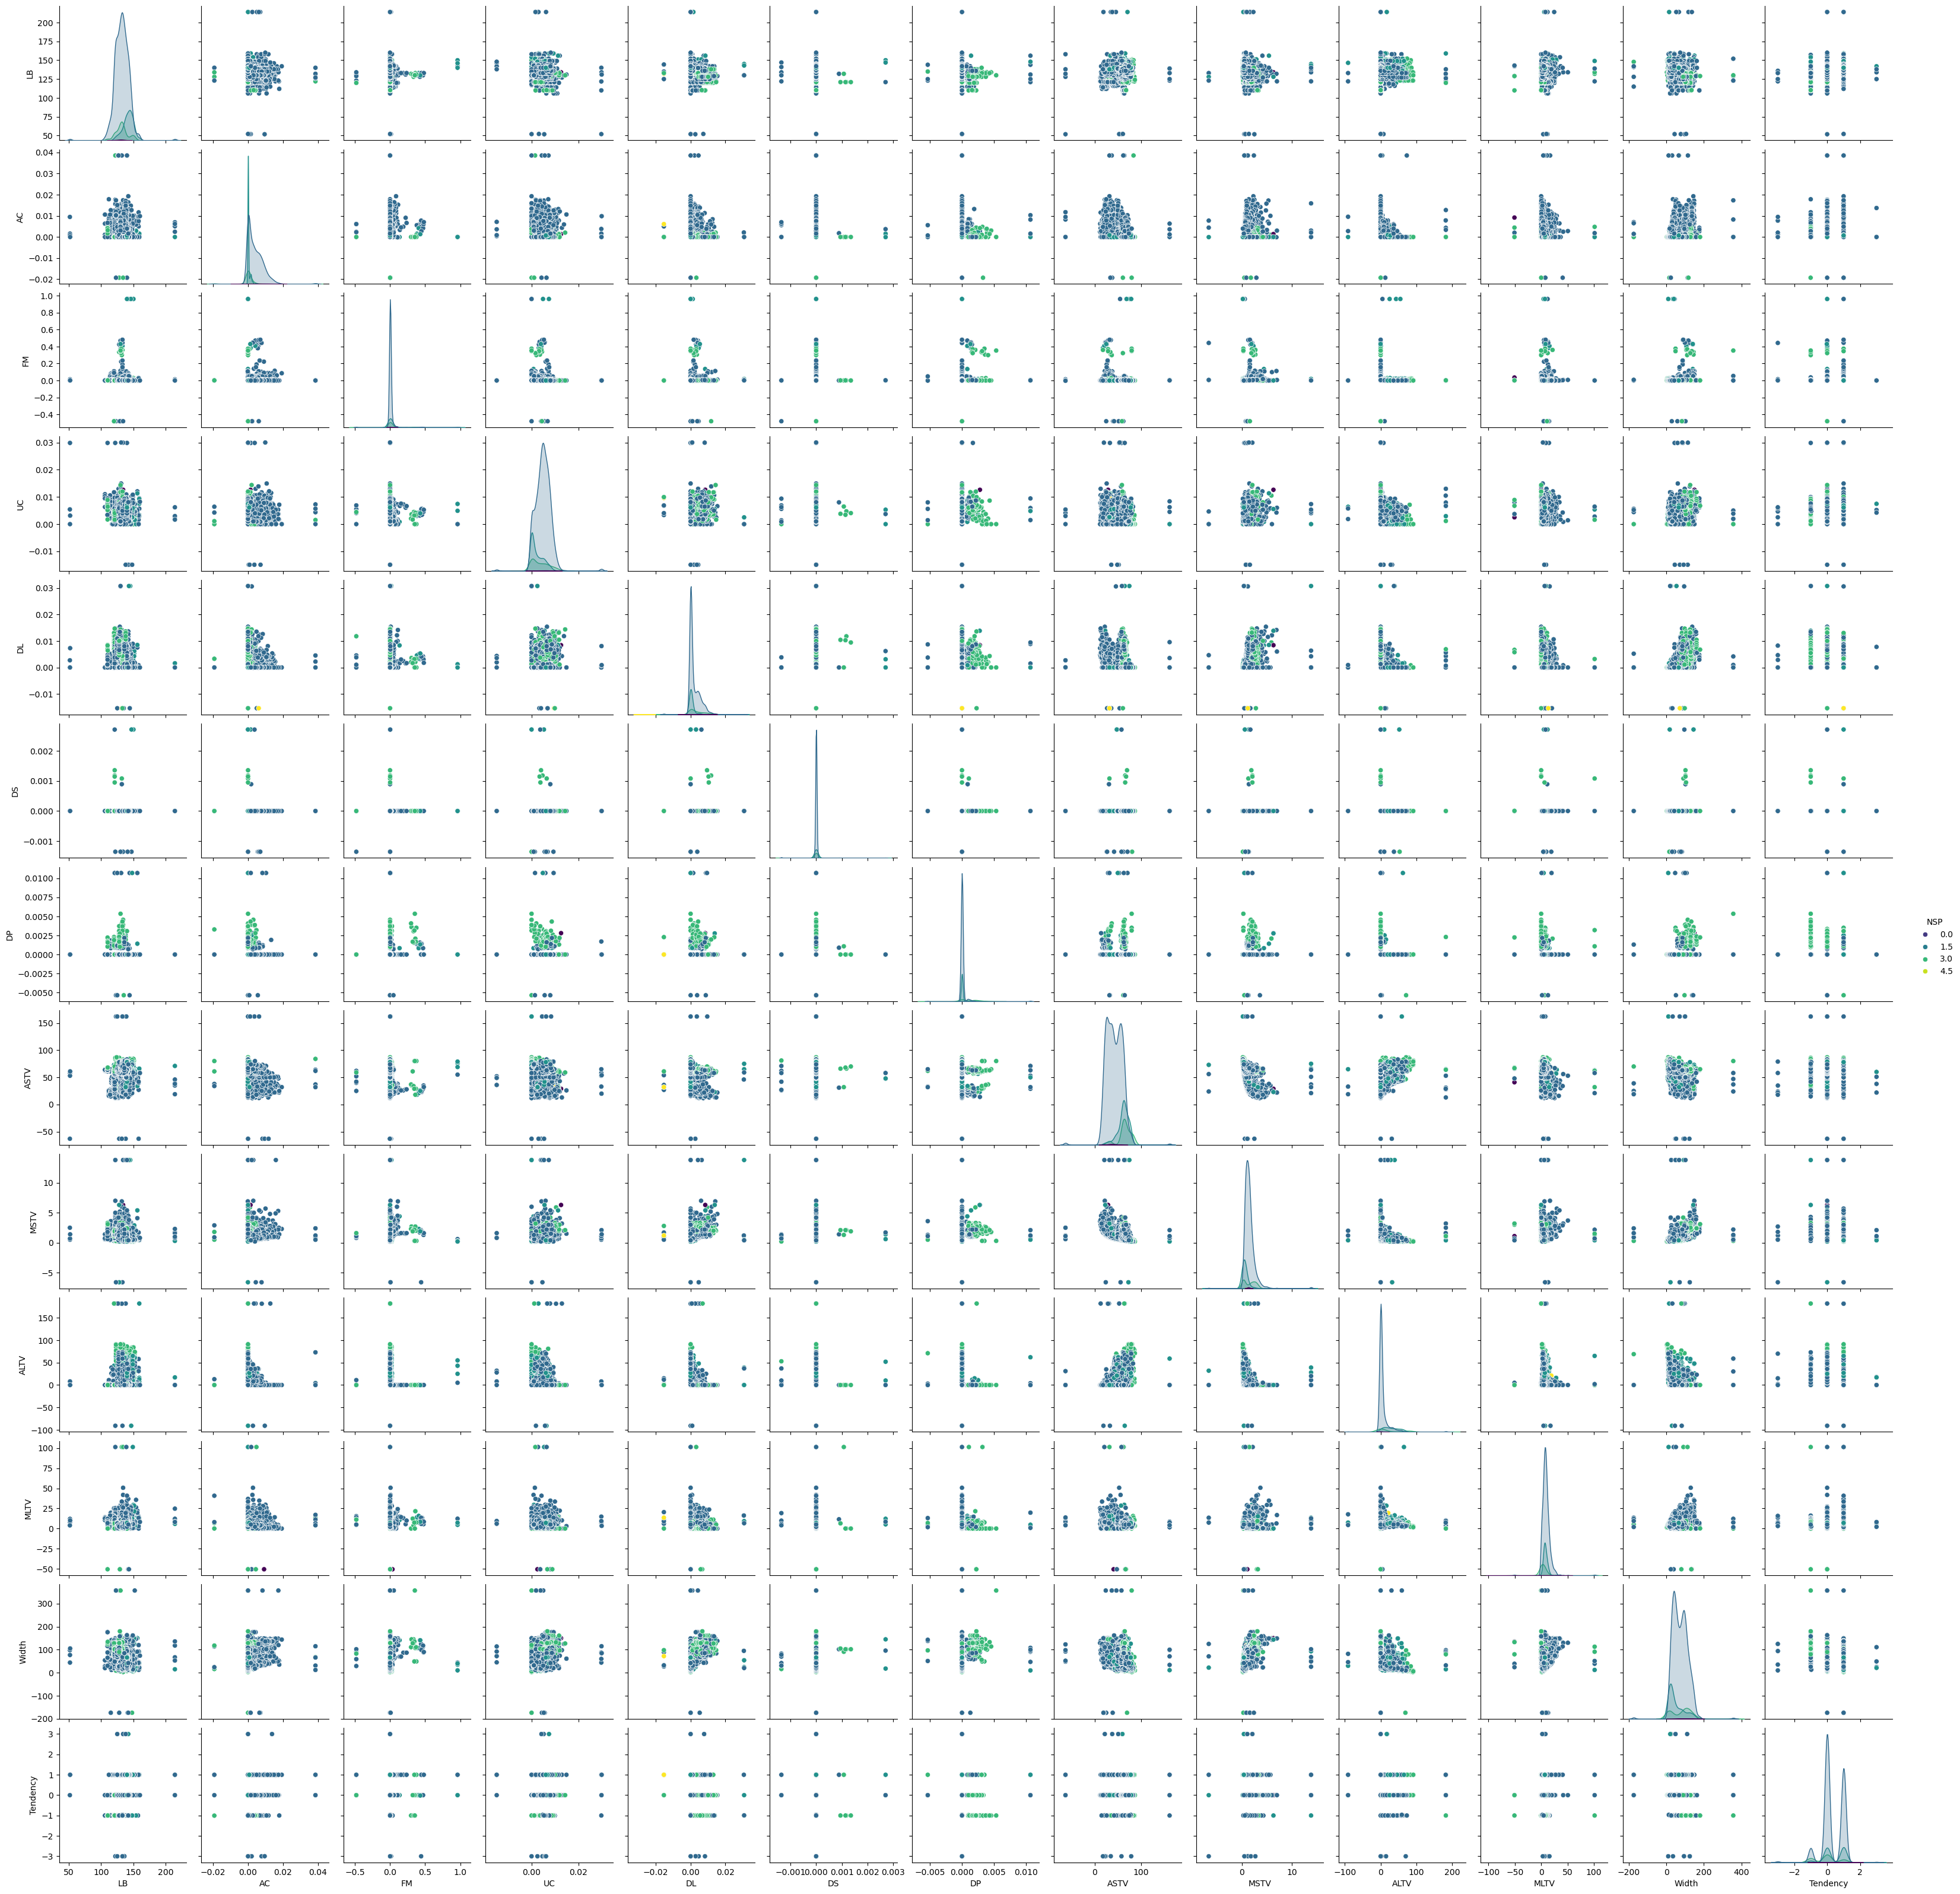

In [51]:
#●	Employ advanced visualization techniques like pair plots, or violin plots for deeper insights.
sns.pairplot(df, hue='NSP', palette='viridis')  # hue is optional if you have categorical labels
plt.show()

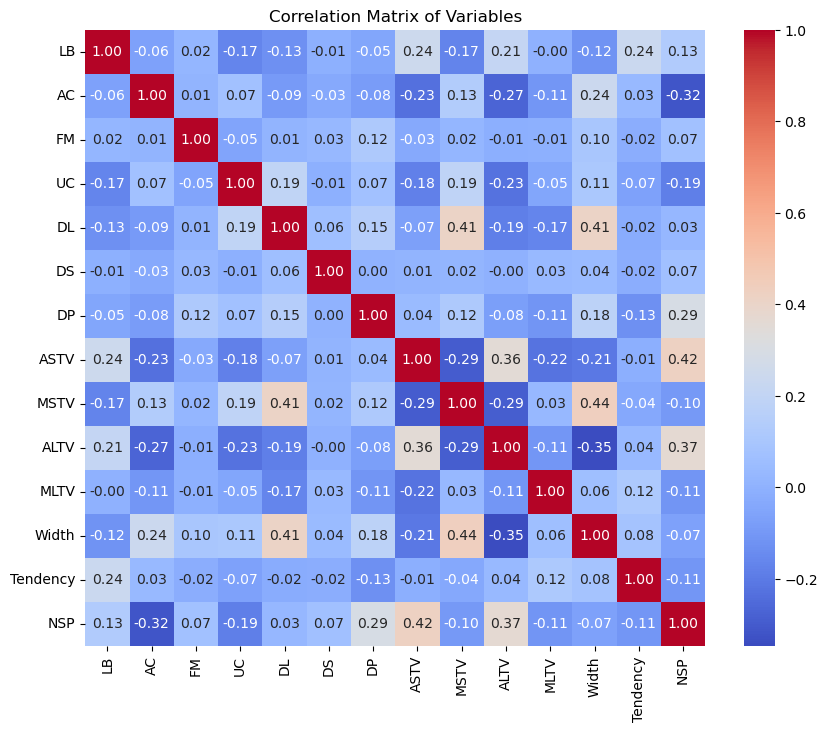

In [52]:
#4.	Pattern Recognition and Insights:
#  Identify any correlations between variables and discuss their potential implications.
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))   #display it as heatmaps
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Variables")
plt.show()

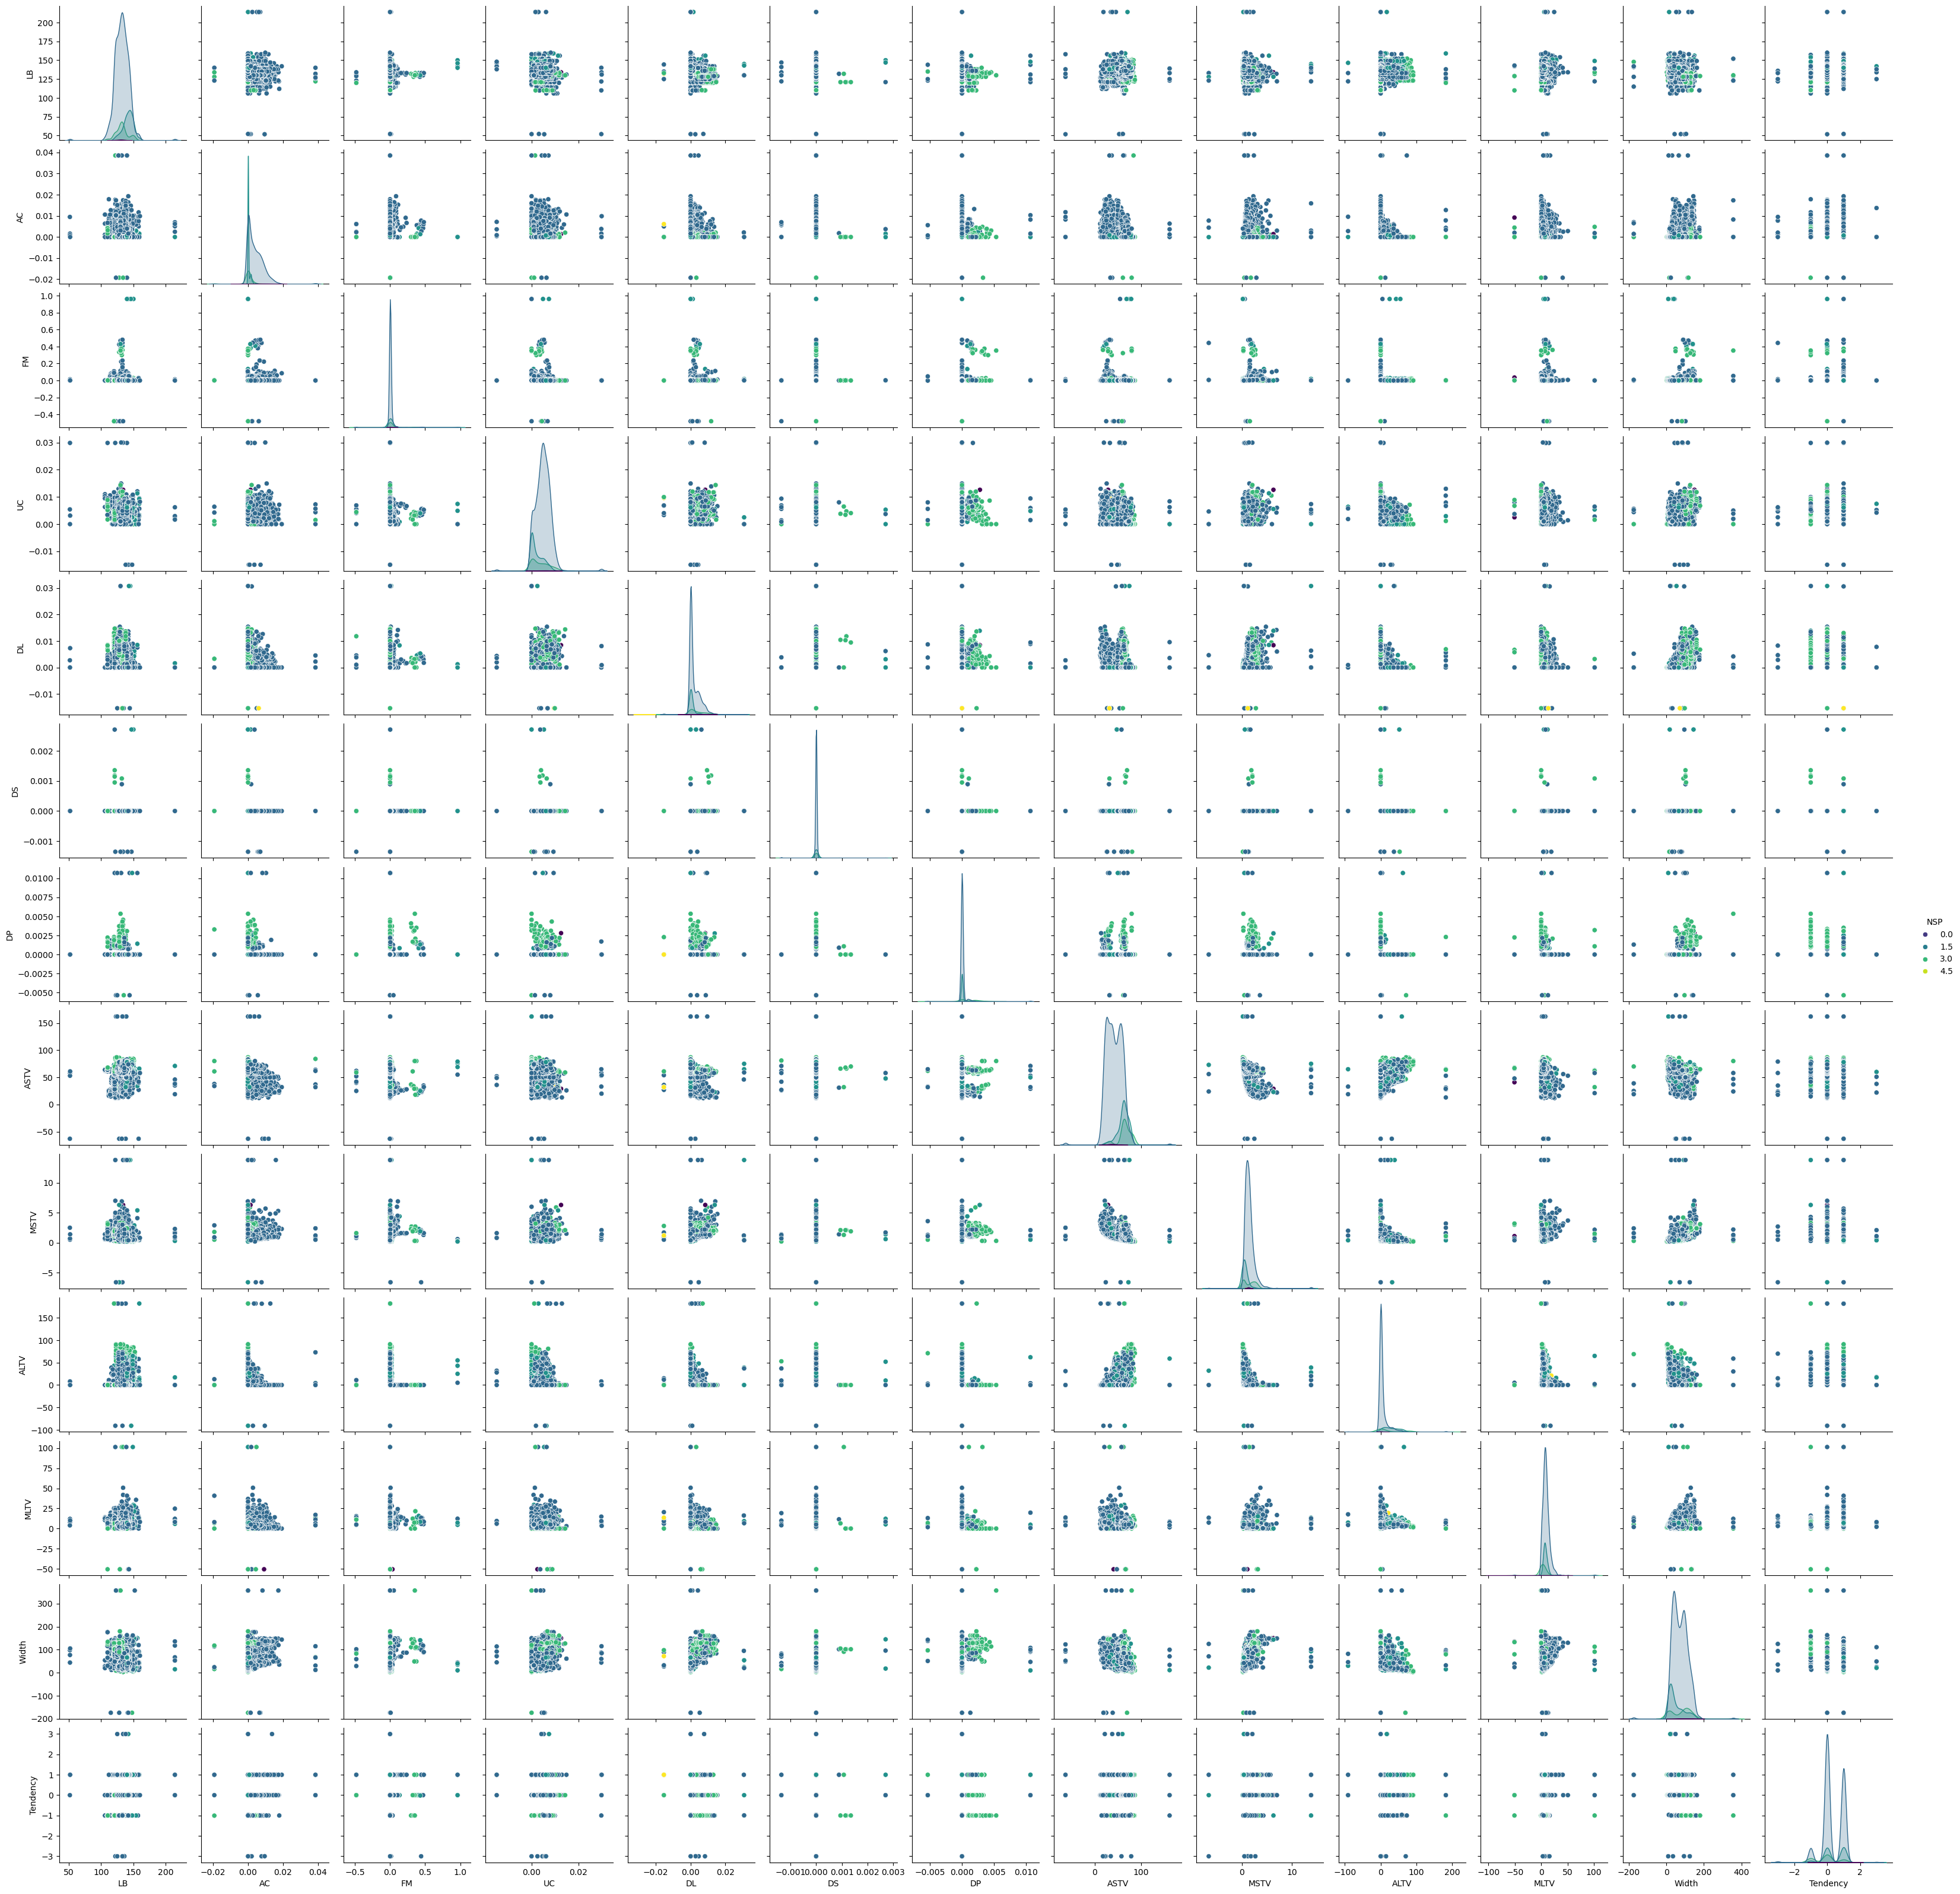

In [53]:
sns.pairplot(df, hue='NSP', palette='viridis') #we can visually confirm corelations or patterns
plt.show()

In [ ]:
# ●	Look for trends or patterns over time if temporal data is available.
# The dataset does not include a time-based or sequential attribute, hence temporal trend analysis could not be performed.

In [ ]:
#5.	Conclusion:
#	Summarize the key insights and patterns discovered through your exploratory analysis.
''' ANS:The exploratory data analysis of the dataset revealed important insights into fetal health. Most features were 
well-distributed with only a few outliers, and class imbalance was observed in the fetal state variable, with normal cases being the majority.
Correlation analysis showed that variability measures like ASTV and ALTV are closely related, indicating they play a key role in assessing fetal
well-being. Overall, the dataset is clean and well-structured, providing a strong foundation for further predictive modeling and health risk 
classification.

In [ ]:
'''2. ●	Discuss how these findings could impact decision-making or further analyses.
ANS: The findings from this analysis can greatly support medical professionals in making timely and informed decisions about fetal health.
By understanding which parameters—such as ASTV, ALTV, and baseline FHR—show strong correlations with abnormal fetal states, clinicians can focus on 
the most critical indicators during monitoring. This insight can also help in designing automated systems for early risk detection using machine 
learning models. Furthermore, the patterns discovered here form a solid foundation for predictive analysis, allowing hospitals or researchers to 
develop reliable tools for classifying fetal conditions and improving prenatal care outcomes.